<a href="https://colab.research.google.com/github/Beast-Hunter/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=column_names)

print(df.head())

--2025-04-18 20:35:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.data.1’

iris.data.1             [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-04-18 20:35:56 (72.2 MB/s) - ‘iris.data.1’ saved [4551]

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
X = df.drop('class', axis=1)
y = df['class']

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

scaler_minmax = MinMaxScaler()
X_norm = scaler_minmax.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [17]:
def evaluate_model(model, X_data, y_true):
    y_pred = model.fit_predict(X_data)
    n_clusters = len(np.unique(y_pred))

    silhouette = silhouette_score(X_data, y_pred)
    ch_score = calinski_harabasz_score(X_data, y_pred)
    db_score = davies_bouldin_score(X_data, y_pred)
    return silhouette, ch_score, db_score

In [30]:
results = []

datasets = {"Standardized": X_std, "Normalized": X_norm, "PCA": X_pca}

cluster_counts = [3, 4, 5]

In [31]:
for preprocess_name, X_data in datasets.items():
    for k in cluster_counts:
        models = {
            "KMeans": KMeans(n_clusters=k, random_state=42),
            "Agglomerative Clustering": AgglomerativeClustering(n_clusters=k),
            "Gaussian Mixture": GaussianMixture(n_components=k, random_state=42)
        }

        for model_name, model in models.items():
            silhouette, ch_score, db_score = evaluate_model(model, X_data, y)
            results.append([preprocess_name, model_name, k, silhouette, ch_score, db_score])

In [36]:
results_df = pd.DataFrame(results, columns=["Preprocessing", "Model", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

results_df

,Preprocessing,Model,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,Standardized,KMeans,3,0.478724,156.143038,0.786801
1,Standardized,Agglomerative Clustering,3,0.445540,220.260437,0.805940
2,Standardized,Gaussian Mixture,3,0.409184,133.702848,0.866857
3,Standardized,KMeans,4,0.387247,205.949969,0.865605
4,Standardized,Agglomerative Clustering,4,0.399326,198.730315,0.981081
5,Standardized,Gaussian Mixture,4,0.256893,141.395995,1.209978
6,Standardized,KMeans,5,0.347265,201.987516,0.940632
7,Standardized,Agglomerative Clustering,5,0.354970,194.961557,0.946529
8,Standardized,Gaussian Mixture,5,0.196807,130.601950,1.243739
9,Normalized,KMeans,3,0.482472,350.061404,0.787498


In [38]:
for model_name in results_df['Model'].unique():
    print(model_name)
    print(results_df[results_df['Model'] == model_name].pivot(index='Clusters', columns='Preprocessing', values=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']).round(2))


KMeans
              Silhouette                    Calinski-Harabasz          \
Preprocessing Normalized   PCA Standardized        Normalized     PCA   
Clusters                                                                
3                   0.48  0.60         0.48            350.06  692.40   
4                   0.44  0.56         0.39            312.61  717.48   
5                   0.42  0.51         0.35            262.02  640.47   

                           Davies-Bouldin                     
Preprocessing Standardized     Normalized   PCA Standardized  
Clusters                                                      
3                   156.14           0.79  0.57         0.79  
4                   205.95           0.91  0.62         0.87  
5                   201.99           0.99  0.75         0.94  
Agglomerative Clustering
              Silhouette                    Calinski-Harabasz          \
Preprocessing Normalized   PCA Standardized        Normalized     PCA   
Clust

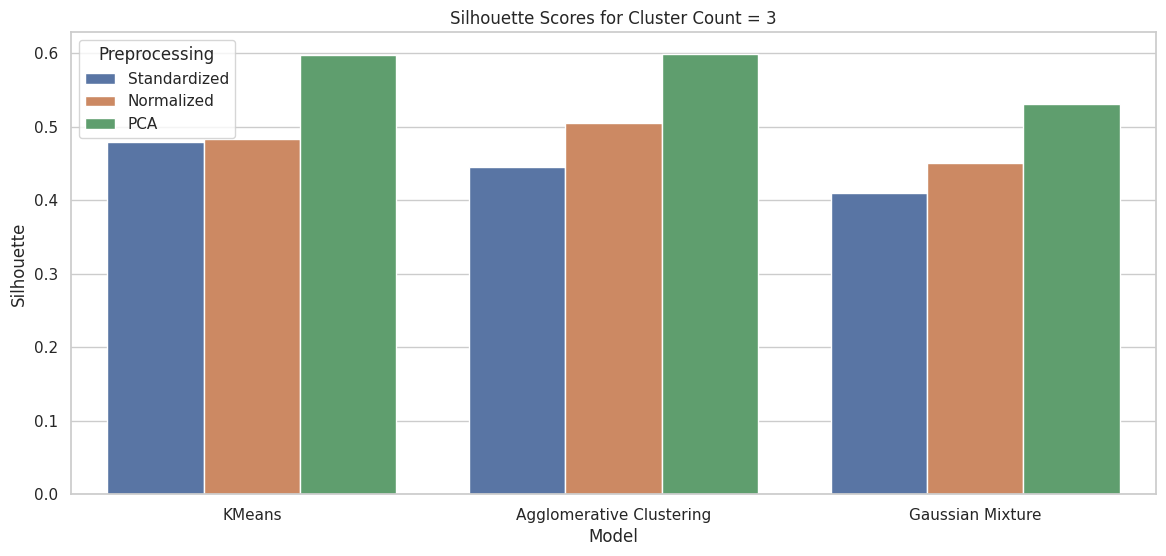

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x="Model", y="Silhouette", hue="Preprocessing", data=results_df[results_df['Clusters'] == 3])
plt.title("Silhouette Scores for Cluster Count = 3")
plt.show()